In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [6]:
df = pd.read_csv("tabel2.csv")
df.head()

,a,b,c,d,e,f
0,606.0,57.0,395.0,0.501778,0.146834,0.199956
1,607.0,88.0,395.0,0.521767,0.146887,0.200022
2,608.0,120.0,392.0,0.541762,0.146955,0.200019
3,609.0,151.0,391.0,0.561758,0.146990,0.200089
4,610.0,182.0,388.0,0.581770,0.147000,0.200120


Text(0, 0.5, 'robot')

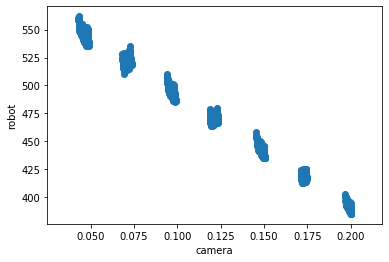

In [7]:
plt.scatter(df['f'], df['c'])
plt.xlabel("camera")
plt.ylabel("robot")

In [8]:
# X = df[:, :3]

X = df.values[:, :3]
y = df.values[:, 3:]

X.shape,  y.shape


((2126, 3), (2126, 3))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# y_train = scaler.transform(y_train)
# y_test = scaler.transform(y_test)

In [21]:
from joblib import dump, load

model1 = MLPRegressor(hidden_layer_sizes=(chromosome.random_layer_size,),
                 activation='relu',
                 solver=chromosome.random_solver,
                 learning_rate=chromosome.random_learning_rate,
                 learning_rate_init=chromosome.random_learning_rate_init,
                 alpha=chromosome.random_alpha)
model1.fit(X_train, y_train)

from sklearn_export import Export

# Save using sklearn_export
export = Export(model1)
export.to_json()

In [11]:
import random

class Chromosome():
    def __init__(self):
        self.fitness = 0
        self.random_layer_size = random.randrange(1, 20)
        self.random_learning_rate_init = round(random.uniform(0.01, 0.2), 2)
        self.random_alpha = round(random.uniform(0.01, 0.2), 2)
        self.random_solver = random.choice(['lbfgs', 'sgd', 'adam'])
        self.random_learning_rate = random.choice(['constant', 'invscaling', 'adaptive'])

In [12]:
def generate_population(population_size):
    print("Start generation")
    population = []
    for i in range(0, population_size):
        print("Generated number: " + str(i))
        population.append(Chromosome())
        
    return population

In [15]:
def calculate_fitness(predictions, labels):
    
    X_errors = []
    y_errors = []
    z_errors = []
 
    predictions = np.array(predictions)
    labels = np.array(labels)
 
    for pred, label in zip(predictions, labels):
        X_err = label[0] - pred[0]
        y_err = label[1] - pred[1]
        z_err = label[2] - pred[2]

        X_errors.append(X_err)
        y_errors.append(y_err)
        z_errors.append(z_err)
        
    print("Klaar met loop")
 
    return np.average(X_errors) + np.average(y_errors) + np.average(z_errors)

In [16]:
initial_population = generate_population(50)

iterations = 1

# for _ in range(0, iterations):
    
# test = MLPRegressor()
for chromosome in initial_population:
    print("next")
#     asdf = MLPRegressor()
    asdf = MLPRegressor(hidden_layer_sizes=(chromosome.random_layer_size,),
                     activation='relu',
                     solver=chromosome.random_solver,
                     learning_rate=chromosome.random_learning_rate,
                     learning_rate_init=chromosome.random_learning_rate_init,
                     alpha=chromosome.random_alpha)
    asdf.fit(X_train, y_train)
    predictions = asdf.predict(X_test)

    chromosome.score = calculate_fitness(predictions, y_test)

sorted_pop = sorted(population, key=lambda x: x[0])

sorted_pop

Start generation
Generated number: 0
Generated number: 1
Generated number: 2
Generated number: 3
Generated number: 4
Generated number: 5
Generated number: 6
Generated number: 7
Generated number: 8
Generated number: 9
Generated number: 10
Generated number: 11
Generated number: 12
Generated number: 13
Generated number: 14
Generated number: 15
Generated number: 16
Generated number: 17
Generated number: 18
Generated number: 19
Generated number: 20
Generated number: 21
Generated number: 22
Generated number: 23
Generated number: 24
Generated number: 25
Generated number: 26
Generated number: 27
Generated number: 28
Generated number: 29
Generated number: 30
Generated number: 31
Generated number: 32
Generated number: 33
Generated number: 34
Generated number: 35
Generated number: 36
Generated number: 37
Generated number: 38
Generated number: 39
Generated number: 40
Generated number: 41
Generated number: 42
Generated number: 43
Generated number: 44
Generated number: 45
Generated number: 46
Genera

NameError: name 'population' is not defined